<a href="https://colab.research.google.com/github/Rutujabadve/Digit_Recognition./blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building a Neural Network For Handwritten Digit Recognition.**

In [ ]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#unpacking the dataset into train and test datasets
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
#displaying shape of data
X_train[0].shape

(28, 28)

In [ ]:
#Checking values of each pixel before normalization
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

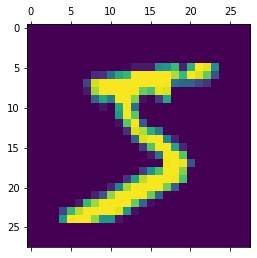

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
#To convert images into greyscale 
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_trainr=np.array(X_train).reshape(-1,28,28,1) #increasing one dimension for kernal operation
X_testr=np.array(X_test).reshape(-1,28,28,1) #increasing one dimention for kernal operation

In [ ]:
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

#Creating a neural network
model = keras.Sequential()

#Convolutional layer with rectified linear unit activation
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=X_trainr.shape[1:]))

#another such layer
model.add(Conv2D(64,(3,3),activation='relu'))

#Choosing the best features via pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#Randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))

#flatten since there are too many dimensions
model.add(Flatten())

#fully connected layer to get all relevant data
model.add(Dense(128,activation='relu'))

#one more dropout for convergence
model.add(Dropout(0.5))

#output a softmax to squash the matrix into output probabilities
model.add(Dense(10,activation='softmax'))

model.compile(
    optimizer ='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#train the model
model.fit(X_trainr,y_train, epochs = 5,verbose=1)

Epoch 1/5
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1925 - accuracy: 0.9424
Epoch 2/5
1875/1875 [==============================] - 149s 79ms/step - loss: 0.0801 - accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 149s 80ms/step - loss: 0.0596 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 149s 80ms/step - loss: 0.0490 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0407 - accuracy: 0.9867


In [ ]:
#Evaluate the model
model.evaluate(X_testr, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.0275 - accuracy: 0.9917


[0.027490492910146713, 0.9916999936103821]

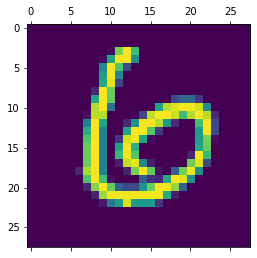

In [ ]:
plt.matshow(X_test[11])

In [ ]:
#Using model to predict output
y_predicted = model.predict(X_testr)
y_predicted[11]

array([2.3204958e-09, 6.7685430e-13, 2.0634847e-14, 1.8334582e-17,
       4.4484333e-11, 1.8267045e-09, 1.0000000e+00, 2.2895770e-19,
       8.2443663e-10, 1.8329051e-14], dtype=float32)

In [ ]:
np.argmax(y_predicted[11])

6

In [ ]:
#Saving the model to drive
path = '/content/drive/MyDrive/colab_data/model2'
model.save(path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab_data/model2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/colab_data/model2/assets
